In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
DATA_DIR = '../data/vibrio'

In [3]:
filenames = os.listdir(DATA_DIR)

In [4]:
im_arr = cv2.imread(os.path.join(DATA_DIR, '4-57-vibrio.jpg'))

In [5]:
im_arr.shape

(3000, 4000, 3)

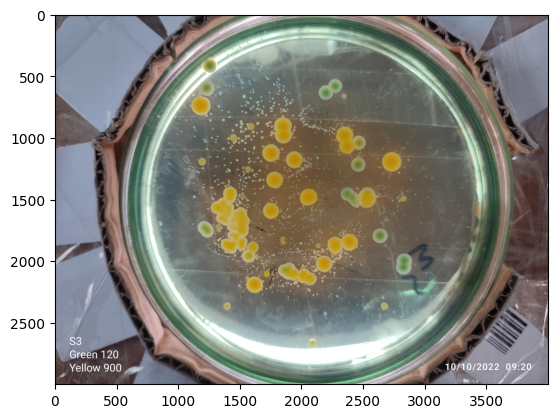

In [6]:
plt.imshow(im_arr[:,:,::-1])

In [7]:
hsvFrame = cv2.cvtColor(im_arr, cv2.COLOR_BGR2HSV)

In [8]:
# yellow color
yellow_hue = [25, 35]
yellow_sat = [100, 255]
yellow_value = [20, 255]

green_hue = [40, 65]
green_sat = [100, 255]
green_value = [20, 255]

black_hue = [0, 255]
black_sat = [0, 255]
black_value = [0, 50]

In [9]:
yellow_lower = np.array([25, 100, 20], np.uint8)
yellow_upper = np.array([35, 255, 255], np.uint8)
yellow_mask = cv2.inRange(hsvFrame, yellow_lower, yellow_upper)

green_lower = np.array([40, 100, 20], np.uint8)
green_upper = np.array([65, 255, 255], np.uint8)
green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)

black_lower = np.array([0, 0, 0], np.uint8)
black_upper = np.array([255, 255, 30], np.uint8)
black_mask = cv2.inRange(hsvFrame, black_lower, black_upper)

In [10]:
kernel = np.ones((5, 5), "uint8")

In [11]:
# For yellow color
yellow_mask = cv2.dilate(yellow_mask, kernel)
res_yellow = cv2.bitwise_and(hsvFrame, hsvFrame, mask = yellow_mask)

# For green color
green_mask = cv2.dilate(green_mask, kernel)
res_green = cv2.bitwise_and(hsvFrame, hsvFrame, mask = green_mask)

# For black color
black_mask = cv2.dilate(black_mask, kernel)
res_black = cv2.bitwise_and(hsvFrame, hsvFrame, mask = black_mask)

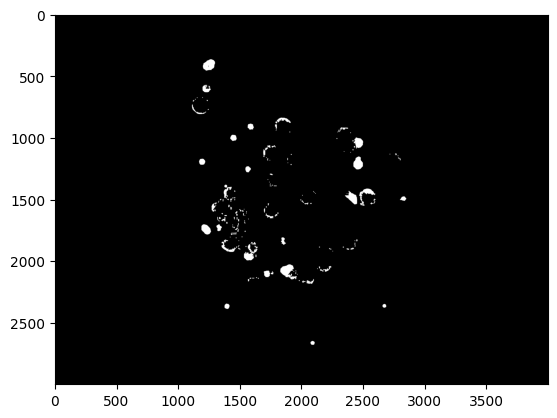

In [13]:
plt.imshow(yellow_mask, cmap='gray')

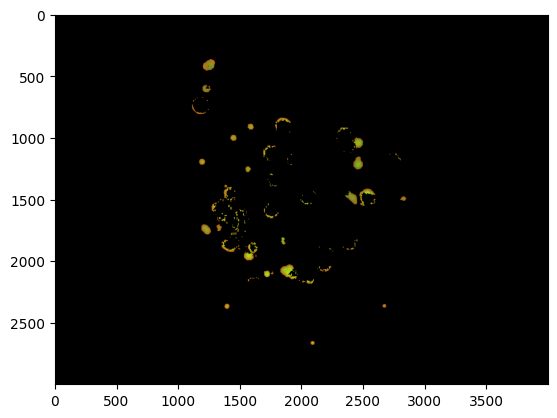

In [14]:
plt.imshow(res_yellow[:, :, ::-1])

In [15]:
im_arr_draw = im_arr.copy()

In [16]:
height_img, width_img, channel = im_arr.shape

In [17]:
output = []

In [18]:
def calculate_area(image, bboxes):
    area_image_mm = 7854
    h, w, c = image.shape
    area_image = h * w
    
    area_list = []
    for x, y, w, h in bboxes:
        area_bbox = w * h
        area_list.append((area_bbox / area_image) * area_image_mm)
        
    return sum(area_list)

In [19]:
# Creating contour to track red color
contours, hierarchy = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
yellow_bboxes = []
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    is_within = (x-(height_img//2))**2 + (y-(width_img//2))**2 < (((height_img-500)/2)**2)
    
    if(100 <= area <= 15000) & is_within:
        im_arr_draw = cv2.rectangle(im_arr_draw, (x, y), (x + w, y + h),  (0, 255, 0), 5)
        yellow_bboxes.append([x,y,w,h])

total_area = calculate_area(im_arr, yellow_bboxes)
output.append({'color': 'yellow', 'total_colony': len(yellow_bboxes), 'avg_size': total_area})

In [ ]:
# Creating contour to track red color
contours, hierarchy = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
green_bboxes = []
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    is_within = (x-(height_img//2))**2 + (y-(width_img//2))**2 < (((height_img-250)/2)**2)
    
    if(100 <= area <= 15000) & is_within:
        im_arr_draw = cv2.rectangle(im_arr_draw, (x, y), (x + w, y + h),  (0, 255, 0), 5)
        green_bboxes.append([x, y, w, h])
        

total_area = calculate_area(im_arr, green_bboxes)
output.append({'color': 'green', 'total_colony': len(green_bboxes), 'avg_size': total_area})

In [ ]:
# Creating contour to track red color
contours, hierarchy = cv2.findContours(black_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
black_bboxes = []
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    is_within = (x-(height_img//2))**2 + (y-(width_img//2))**2 < (((height_img-500)/2)**2)
    
    if(100 <= area <= 15000) & is_within:
        im_arr_draw = cv2.rectangle(im_arr_draw, (x, y), (x + w, y + h),  (0, 255, 0), 10)
        black_bboxes.append([x,y,w,h])

total_area = calculate_area(im_arr, black_bboxes)
output.append({'color': 'black', 'total_colony': len(black_bboxes), 'avg_size': total_area})

In [ ]:
output

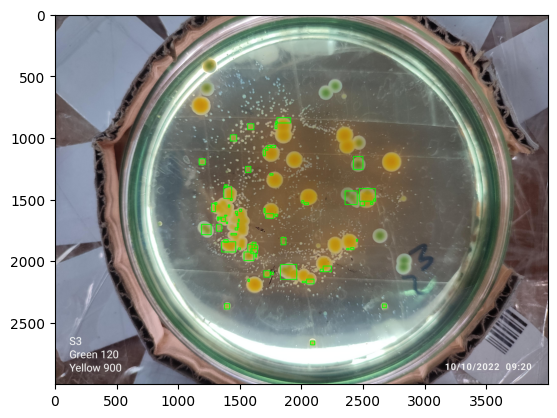

In [ ]:
plt.imshow(im_arr_draw[:, :, ::-1])